# Analysis of Foot players based on Fifa20 Video Game Data

## Problem Statement
Data Analysis on Atrributes and Skills of Football players on the basis of data available in Fifa20 Video Game.
Clustering Players on the basis of attributes and skills using Fifa 20 data 
Finding out top ten countries with most players 
Plotting the distribution of overall rating vs. Age of players. Interpret what is the age after which a player stops improving.
Which type of offensive players get paid the most: the striker, the right-winger, or the left-winger?

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')


In [2]:
#Reading the given fifa20 dataset
data = pd.read_csv('players_20.csv')
data.shape

(18278, 104)

## Domain Analysis

**Short Description:**
>FIFA 20 Football is arguably the most popular sport in the world and FIFA is the most popular football (soccer) simulation game by Electronic Arts (EA Sports).
The dataset provided includes the players data for the Career Mode from FIFA 15 to FIFA 20 ("players_20.csv"). The data allows multiple comparisons of the same players across the last 6 versions of the videogame.



**Sources :**
>1. Fifa 20 Dataset       
2. https://sofifa.com/      
3. Google.com1      

## Basic Checks

In [3]:
# Checking The Size and Shape of The Data Provided
print(data.shape)
print(data.size)

(18278, 104)
1900912


Total 18,278 Rows and 104 Columns in the Dataset

In [4]:
#Checking fisrt 5 Rows
pd.set_option('display.max_columns', None) 
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [5]:
#Structure of The Dataset
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    sofifa_id                   18278 non-null  int64  
 1    player_url                  18278 non-null  object 
 2    short_name                  18278 non-null  object 
 3    long_name                   18278 non-null  object 
 4    age                         18278 non-null  int64  
 5    dob                         18278 non-null  object 
 6    height_cm                   18278 non-null  int64  
 7    weight_kg                   18278 non-null  int64  
 8    nationality                 18278 non-null  object 
 9    club                        18278 non-null  object 
 10   overall                     18278 non-null  int64  
 11   potential                   18278 non-null  int64  
 12   value_eur                   18278 non-null  int64  
 13   wage_eur      

In [6]:
#Description/Summary of the Dataset
data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

## Data Cleaning and Manipulation

**Seperating GoalKeeper Data and Field Players' Data**

In [7]:
Team_Position = data[['team_position']]

In [8]:
Team_Position.isnull().sum()

team_position    240
dtype: int64

In [9]:
Team_Position = Team_Position.fillna('NA')
Team_Position.head()

team_position
0            RW
1            LW
2           CAM
3            GK
4            LW

In [10]:
#Some of the columns are not important, so we can drop them.
redundant_columns = ['player_positions','sofifa_id','player_url','player_tags','long_name','dob','team_position',
                     'team_jersey_number','nation_jersey_number','nation_position','loaned_from','player_traits',
                     'work_rate','body_type','real_face','joined', 'contract_valid_until',
                     'gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']
data = data.drop(redundant_columns, axis = 1)

In [11]:
BMI = pd.Series((data.weight_kg*10000)/(data.height_cm*data.height_cm))
data['BMI']= BMI
data.head()

short_name  age  height_cm  weight_kg nationality  \
0           L. Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   
3           J. Oblak   26        188         87    Slovenia   
4          E. Hazard   28        175         74     Belgium   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   
3      Atlético Madrid       91         93   77500000    125000   
4          Real Madrid       91         91   90000000    470000   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         5          4            4   
1          Right                         5          4            5   
2          Right                         5          5            5   
3          Right                         3          3            1   
4          Right                         4          4            4   

   release_clause_eur  pace  shooting  passing  dribbling  defending  physic  \
0         195800000.0  87.0      92.0     92.0       96.0       39.0    66.0   
1          96500000.0  90.0      93.0     82.0       89.0       35.0    78.0   
2         195200000.0  91.0      85.0     87.0       95.0       32.0    58.0   
3         164700000.0   NaN       NaN      NaN        NaN        NaN     NaN   
4         184500000.0  91.0      83.0     86.0       94.0       35.0    66.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   
3                  13                   11                          15   
4                  81                   84                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   
3                       43                 13               12           13   
4                       89                 83               95           83   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   
2                 87                  81                  95   
3                 14                  40                  30   
4                 79                  83                  94   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   
2                     94                     89                96   
3                     43                     60                67   
4                     94                     88                95   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   
2                  92                84                80             61   
3                  88                49                59             78   
4                  90                94                82             56   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48 

In [12]:
data.shape

(18278, 82)

In [13]:
data =  pd.concat([data, Team_Position],axis = 1)

In [14]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb',
           'ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [15]:
data[columns].shape

(18278, 26)

In [16]:
for col in columns:
  data[col]=data[col].str.split('+',n=1,expand = True)[0]

data[columns]

ls   st   rs   lw   lf   cf   rf   rw  lam  cam  ram   lm  lcm   cm  \
0       89   89   89   93   93   93   93   93   93   93   93   92   87   87   
1       91   91   91   89   90   90   90   89   88   88   88   88   81   81   
2       84   84   84   90   89   89   89   90   90   90   90   89   82   82   
3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4       83   83   83   89   88   88   88   89   89   89   89   89   83   83   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
18273   32   32   32   31   31   31   31   31   31   31   31   33   33   33   
18274   33   33   33   33   32   32   32   33   33   33   33   35   36   36   
18275   43   43   43   43   43   43   43   43   44   44   44   45   46   46   
18276   43   43   43   45   44   44   44   45   46   46   46   46   46   46   
18277   42   42   42   44   43   43   43   44   46   46   46   46   46   46   

       rcm   rm  lwb  ldm  cdm  rdm  rwb   lb  lcb   cb  rcb   rb  
0       87   92   68   66   66   66   68   63   52   52   52   63  
1       81   88   65   61   61   61   65   61   53   53   53   61  
2       82   89   66   61   61   61   66   61   46   46   46   61  
3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4       83   89   66   63   63   63   66   61   49   49   49   61  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
18273   33   33   43   42   42   42   43   45   46   46   46   45  
18274   36   35   44   43   43   43   44   46   47   47   47   46  
18275   46   45   47   49   49   49   47   47   49   49   49   47  
18276   46   46   48   48   48   48   48   48   49   49   49   48  
18277   46   46   48   49   49   49   48   48   50   50   50   48  

[18278 rows x 26 columns]

In [17]:
data[columns] = data[columns].fillna(0)

In [18]:
data[columns] = data[columns].astype(int)

In [19]:
data.head()

short_name  age  height_cm  weight_kg nationality  \
0           L. Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   
3           J. Oblak   26        188         87    Slovenia   
4          E. Hazard   28        175         74     Belgium   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   
3      Atlético Madrid       91         93   77500000    125000   
4          Real Madrid       91         91   90000000    470000   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0           Left                         5          4            4   
1          Right                         5          4            5   
2          Right                         5          5            5   
3          Right                         3          3            1   
4          Right                         4          4            4   

   release_clause_eur  pace  shooting  passing  dribbling  defending  physic  \
0         195800000.0  87.0      92.0     92.0       96.0       39.0    66.0   
1          96500000.0  90.0      93.0     82.0       89.0       35.0    78.0   
2         195200000.0  91.0      85.0     87.0       95.0       32.0    58.0   
3         164700000.0   NaN       NaN      NaN        NaN        NaN     NaN   
4         184500000.0  91.0      83.0     86.0       94.0       35.0    66.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   
3                  13                   11                          15   
4                  81                   84                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   
3                       43                 13               12           13   
4                       89                 83               95           83   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   
2                 87                  81                  95   
3                 14                  40                  30   
4                 79                  83                  94   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   
2                     94                     89                96   
3                     43                     60                67   
4                     94                     88                95   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   
2                  92                84                80             61   
3                  88                49                59             78   
4                  90                94                82             56   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48 

## Exporatory Data Analysis

###  Univariate Analysis

#### 1) Top Ten Countries countributing the most players in the Fifa20 data.

In [20]:
Top_10_Countries =data.nationality.value_counts().head(10)

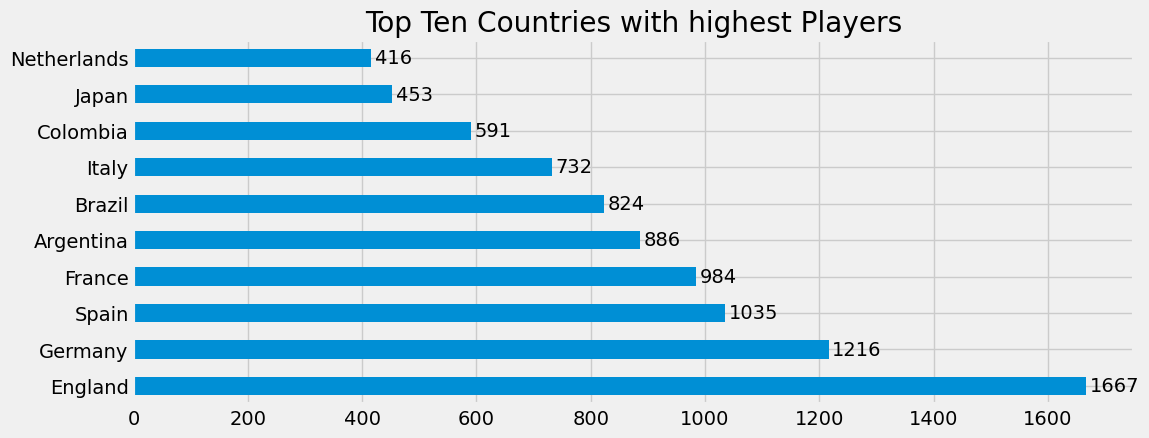

In [21]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.5,4.5
ax=Top_10_Countries.plot(kind='barh', title='Top Ten Countries with highest Players')
for i in ax.containers:
    ax.bar_label(i, padding=2.5)

**Insights:**    
As shown in Figure A.1, England contributes the Most Playeers in Fifa 20 which is close to 10% of the total data.
Germany and Spain are the 2nd and 3rd Respectively. 
Here is the List of top 10 Countries with Number oof players along side.
  1. England    -- 1667
  2. Germany    -- 1216
  3. Spain      -- 1035
  4. France     --  984
  5. Argentina   -- 886
  6. Brazil      -- 824
  7. Italy       -- 732
  8. Colombia    -- 591
  9. Japan       -- 453
  10.Netherlands  -- 416

#### 2) Number of Players  according to  Different Features and Characteristics

>**Dribbling** notes ball control, agility and balance.
**Defending** notes tackling and marking.
**Physical** notes strength and stamina.
**Pace** notes the speed and the acceleration of the player.
**Passing** notes ability to successfully pass the ball with vision.
**Shooting** determines finishing skill and shot power.

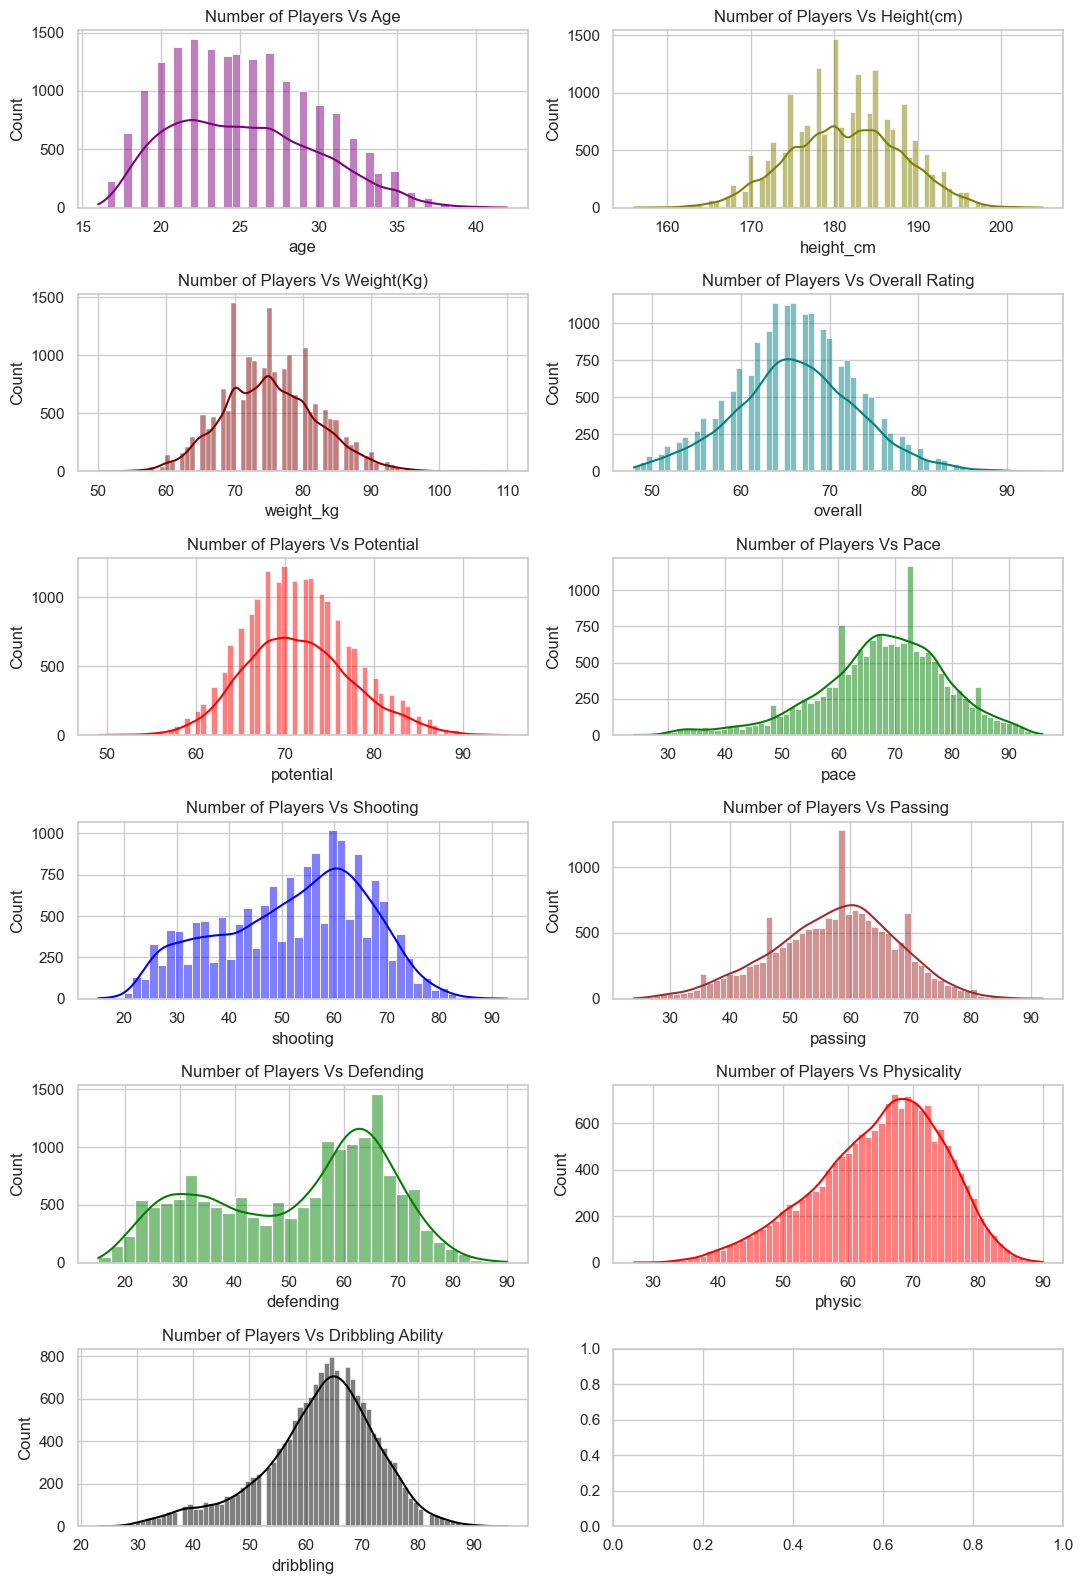

In [22]:
sns.set(style="whitegrid")  
fig,axs = plt.subplots(6,2, figsize = (11,16))
sns.histplot(data=data, x="age", kde=True, color="purple", ax=axs[0, 0]).set(title="Number of Players Vs Age")
sns.histplot(data=data, x="height_cm", kde=True, color="olive", ax=axs[0, 1]).set(title="Number of Players Vs Height(cm)")
sns.histplot(data=data, x="weight_kg", kde=True, color="maroon", ax=axs[1, 0]).set(title="Number of Players Vs Weight(Kg)")
sns.histplot(data=data, x="overall", kde=True, color="teal", ax=axs[1, 1]).set(title="Number of Players Vs Overall Rating")
sns.histplot(data=data, x="potential", kde=True, color="red", ax=axs[2, 0]).set(title="Number of Players Vs Potential")
sns.histplot(data=data, x="pace", kde=True, color="green", ax=axs[2, 1]).set(title="Number of Players Vs Pace")
sns.histplot(data=data, x="shooting", kde=True, color="blue", ax=axs[3, 0]).set(title="Number of Players Vs Shooting")
sns.histplot(data=data, x="passing", kde=True, color="brown", ax=axs[3, 1]).set(title="Number of Players Vs Passing ")
sns.histplot(data=data, x="defending", kde=True, color="green", ax=axs[4, 0]).set(title="Number of Players Vs Defending")
sns.histplot(data=data, x="physic", kde=True, color="red", ax=axs[4, 1]).set(title="Number of Players Vs Physicality")
sns.histplot(data=data, x="dribbling", kde=True, color="black", ax=axs[5, 0]).set(title="Number of Players Vs Dribbling Ability")
fig.tight_layout()

In [23]:
#Checking the data of Players above 40 years of age
Players_Above_40=data[data["age"] > 40].reset_index(drop=True)
Players_Above_40

short_name  age  height_cm  weight_kg   nationality  \
0     G. Buffon   41        192         92         Italy   
1        Hilton   41        180         78        Brazil   
2  C. Lucchetti   41        182         69     Argentina   
3      F. Kippe   41        194         97        Norway   
4      C. Muñoz   42        177         73     Argentina   
5  H. Sulaimani   42        173         70  Saudi Arabia   

                           club  overall  potential  value_eur  wage_eur  \
0                      Juventus       83         83    2600000     58000   
1               Montpellier HSC       78         78          0     21000   
2              Atlético Tucumán       72         72     325000      5000   
3                 Lillestrøm SK       65         65          0      1000   
4  CD Universidad de Concepción       64         64      50000      1000   
5                       Al Ahli       63         63          0      5000   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0          Right                         4          2            1   
1          Right                         2          4            3   
2          Right                         1          3            1   
3           Left                         1          3            2   
4          Right                         1          3            1   
5           Left                         1          3            3   

   release_clause_eur  pace  shooting  passing  dribbling  defending  physic  \
0           4300000.0   NaN       NaN      NaN        NaN        NaN     NaN   
1                 NaN  36.0      51.0     67.0       66.0       80.0    71.0   
2            488000.0   NaN       NaN      NaN        NaN        NaN     NaN   
3                 NaN  25.0      52.0     49.0       34.0       61.0    73.0   
4             68000.0   NaN       NaN      NaN        NaN        NaN     NaN   
5                 NaN  47.0      53.0     68.0       64.0       64.0    72.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  13                   15                          13   
1                  60                   45                          79   
2                  23                   13                          23   
3                  33                   46                          70   
4                  25                   15                          13   
5                  70                   43                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       37                 17               26           20   
1                       74                 51               64           54   
2                       34                 18               24           27   
3                       56                 43               24           51   
4                       36                 12               22           19   
5                       67                 43               63           69   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 13                  35                  28   
1                 48                  73                  73   
2                 30                  32                  35   
3                 53                  55                  49   
4                 20                  34                  31   
5                 69                  68                  64   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     37                     30                55   
1                     35                     36                54   
2                     40                     45                44   
3                     24                     25                27   
4                     53                     56                33   
5                     46                     47                

**Insights:**    
1) Number of Players vs Age: 
>Most of the players are between age 21 to 27. There is heavy decline in the   numbers after age 35.
From age 16 to 20, there is peak rise in number of players.
There seems to have only six players in 41 and 42 age category. Three out of them are Goalkeepeers.
  
  
2) Number of Players Vs Height
> 180 cm is the most common height. Most of the players' height ranges between 175cm to 185 cm.


3) Number of Players Vs Weight 
>70 to 80 kg of weight is the most common among the players.

4) Number of Players Vs Overall Ratings
> Most of the players fall between 60 to 70 overall rating. There is considerable decline in number after 70. A very few players fall above 85 overall rating.

5) Number of Players Vs Potential
> Most of the players have potential around 70. There seems to have steady growth before 70 and steady decline after 70. A few players have potential above 85.

6) Number of Players Vs Pace
>Most of the players fall wthin 65 to 75 pace ratings. Number of players decline after 75.

7) Number of Players Vs Shooting Ability
>Most of the players fall within 55 to 65 Shooting ability. There is steep decline in numbers after 65. A few players have been given shooting ability ratings above 80.

8) Number of Players Vs Passing Ability
>Most of the players have passing ability of 60. 

9) Number of Players Vs Defending Ability
> After the steady rise from 20 to 30, there seems to be decline in upto 55 and again after 55, there is steep rise. Most of the players fall between 55 to 75 ratings.

10) Number of Players Vs Physicality (Strength and Stamina)
> Most of the players have physicality of around 70. With the steady rise in the count from 40 to 70, it falls steeply after 70. Their are veru less players with  physical ability of more than 85. 

11) Number of Players Vs Dribbling ability
> Most of the players have Dribbling ability between 60 and 70 as shown in the graph.


#### 3) Number of Players with their Team Postion

Team Position is the Unique position on the pitch ,for eg Striker, Centre Attacking Midfielder, Centre Back, etc which players have according to their Skills and Role in the team.
>Attackers: ST, RS, LS, LW, RW, CF, RF, LF

>Midfielders: CAM, LM, CM, RM, CDM, LAM, RAM, LDM, RDM, RCM, LCM

>Defenders: LCB, RCB, LB, RB, CB, RWB, LWB

>Goalkeepers: GK

>Substitutes: SUB

>Reserved Players: RES


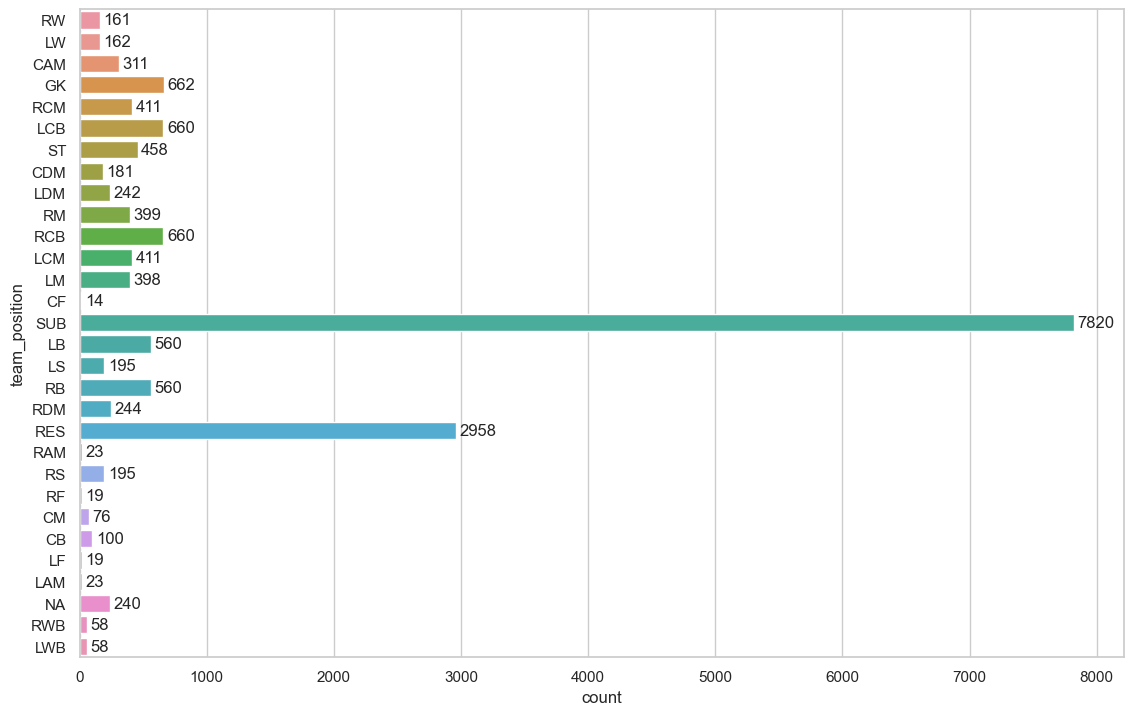

In [24]:
#Count Plot for Team Position
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8
ax = sns.countplot(y='team_position', data=data)
for i in ax.containers:
    ax.bar_label(i, padding=2.5)

**Insights:**     
Most of the players are Substitutes(SUB), their number is 7820. 
Then there are Reserved 2958 players (RES)

There are 662 Goalkeepers in the Dataset.

Number of Attackers
>RW(161), LW(162), ST(458), RS(195), LS(195), CF(14), RF(19), LF(19) are all attackers and They are 1,223 in Total

Number of Midfielders
>CAM(311), RCM(411), CDM(181), LDM(242), RM(399), LM(398), LCM(411), RDM(244), RAM(23), CM(76), LAM(23), are all midfielders. They are 2,719 in Total

Number of Defenders
>LCB(660), RCB(660), LB(560), RB(560), CB(100), RWB(58), LWB(58) are all Midfielders and their total Number is 2,656



#### 4) Number of Players according to International Reputation, Ability Skill Moves Abilty and Ability to play with Weak Foot

In [25]:
print(data['international_reputation'].value_counts(sort=False))
print(data['weak_foot'].value_counts(sort=False))
print(data['skill_moves'].value_counts(sort=False))

5        6
3      292
4       46
2     1140
1    16794
Name: international_reputation, dtype: int64
4     2666
5      245
3    11347
2     3865
1      155
Name: weak_foot, dtype: int64
4    1040
5      49
1    2036
2    8617
3    6536
Name: skill_moves, dtype: int64


[Text(0.5, 1.0, 'Weak Foot: 1 to 5 stars')]

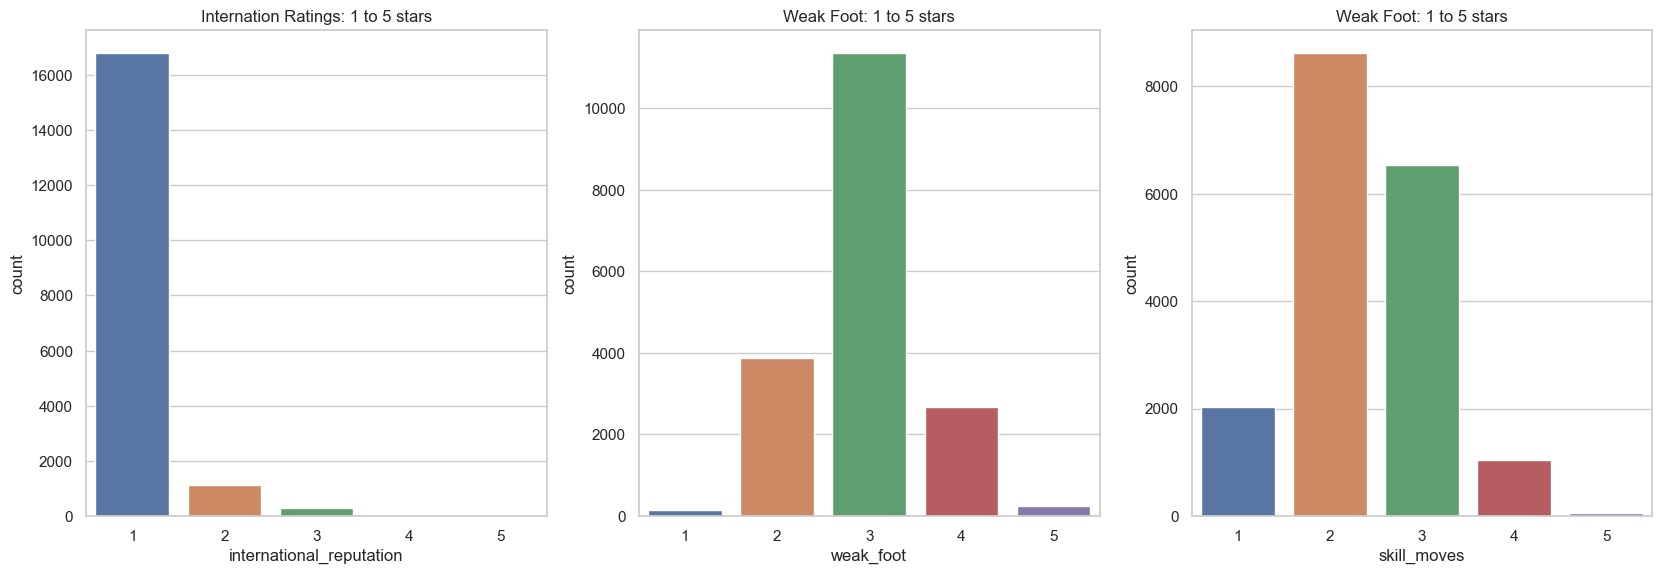

In [26]:
fig, ax = plt.subplots(1,3, figsize=(18, 6))
sns.countplot(x='international_reputation', data=data, ax=ax[0]).set(title='Internation Ratings: 1 to 5 stars')
sns.countplot(x='weak_foot', data=data, ax=ax[1]).set(title='Weak Foot: 1 to 5 stars')
sns.countplot(x='skill_moves', data=data, ax=ax[2]).set(title='Weak Foot: 1 to 5 stars')       


In [27]:
#List of Players with 5 International Reputation Rationgs
Players_5IR=data[data['international_reputation']==5].reset_index(drop=True)
Players_5IR.index+=1
Players_5IR

short_name  age  height_cm  weight_kg nationality  \
1           L. Messi   32        170         72   Argentina   
2  Cristiano Ronaldo   34        187         83    Portugal   
3          Neymar Jr   27        175         68      Brazil   
4          L. Suárez   32        182         86     Uruguay   
5           M. Neuer   33        193         92     Germany   
6     Z. Ibrahimović   37        195         95      Sweden   

                  club  overall  potential  value_eur  wage_eur  \
1         FC Barcelona       94         94   95500000    565000   
2             Juventus       93         93   58500000    405000   
3  Paris Saint-Germain       92         92  105500000    290000   
4         FC Barcelona       89         89   53000000    355000   
5    FC Bayern München       88         88   32000000    155000   
6            LA Galaxy       85         85   14000000     15000   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
1           Left                         5          4            4   
2          Right                         5          4            5   
3          Right                         5          5            5   
4          Right                         5          4            3   
5          Right                         5          4            1   
6          Right                         5          4            5   

   release_clause_eur  pace  shooting  passing  dribbling  defending  physic  \
1         195800000.0  87.0      92.0     92.0       96.0       39.0    66.0   
2          96500000.0  90.0      93.0     82.0       89.0       35.0    78.0   
3         195200000.0  91.0      85.0     87.0       95.0       32.0    58.0   
4         108700000.0  73.0      89.0     80.0       84.0       51.0    84.0   
5          52800000.0   NaN       NaN      NaN        NaN        NaN     NaN   
6          21000000.0  56.0      88.0     77.0       77.0       34.0    78.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
1                  88                   95                          70   
2                  84                   94                          89   
3                  87                   87                          62   
4                  78                   91                          83   
5                  15                   13                          25   
6                  70                   86                          83   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
1                       92                 88               97           93   
2                       83                 87               89           81   
3                       87                 87               96           88   
4                       82                 90               85           86   
5                       55                 11               30           14   
6                       77                 88               77           80   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
1                 94                  92                  96   
2                 76                  77                  92   
3                 87                  81                  95   
4                 82                  72                  84   
5                 11                  59                  46   
6                 78                  73                  84   

   movement_acceleration  movement_sprint_speed  movement_agility  \
1                     91                     84                93   
2                     89                     91                87   
3                     94                     89                96   
4                     76                     70                79   
5                     54                     60                51   
6                     57                     55                72   

   movement_reactions  movement_balance 

**Insights:**
> 1. There are only few players with 4 to 5 stars Reputation in the given data. As shown in above graph, only 6 Players have 5 star Rating. Most of the players are not recognised internationally.
Above data shows the List of 6 Players with 5 star Ratings. They are 1) Lionel Messi, 2) Christiano Ronaldo, 3) Neymar Jr, 4) L. Saurez, 5) M. Neuer, and 6) Z. Ibrahimovic


> 2. Most of the players are rated 3 Stars in Weak Foot Ratings. There are only 245 players with 5 star ratings in Weak Foot ability

> 3. In Skill Moves Rating, most of the players fall in 2 and # Stars (close to 80%). Only 49 players have 5 Star skill moves ratings

#### 5) Number of Players with Left vs Right Preferred Foot

In [28]:
print(data['preferred_foot'].value_counts(sort=False)/182.78)

Left     23.624029
Right    76.375971
Name: preferred_foot, dtype: float64


[Text(0.5, 1.0, 'Number of Players with Left vs Right preferred foot')]

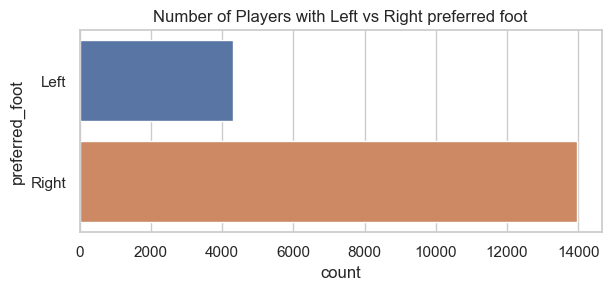

In [29]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,2.5
sns.countplot(y='preferred_foot', data=data).set(title='Number of Players with Left vs Right preferred foot') 

**Insights:**   
> Most of the Players are Right Footed. Aroung 76% players have Right preferred Foot. Remaining 24% preferr Left Foot.

#### 6) Numbers of Players according to their Wages and Effect of International reputation on it (First 2000 players)

[Text(0.5, 1.0, 'KDE plot for Wages of Players')]

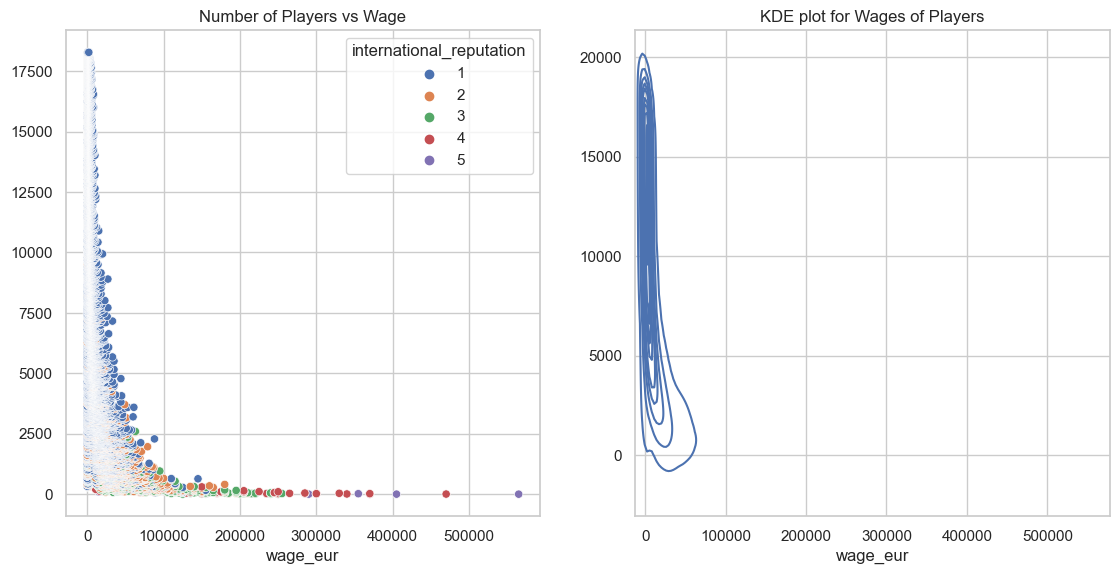

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
sns.scatterplot(data=data, x='wage_eur', y=data.index, hue='international_reputation', palette="deep",ax=ax[0]).set(title='Number of Players vs Wage')
sns.kdeplot(data=data, x='wage_eur', y=data.index, ax=ax[1]).set(title='KDE plot for Wages of Players')

In [31]:
Top_5_Earning_players = data.sort_values("wage_eur", axis = 0, ascending = False)[['short_name', 'wage_eur', 'international_reputation','club', 'nationality','age','potential']].head().reset_index(drop=True)
Top_5_Earning_players.index+=1
Top_5_Earning_players

short_name  wage_eur  international_reputation             club  \
1           L. Messi    565000                         5     FC Barcelona   
2          E. Hazard    470000                         4      Real Madrid   
3  Cristiano Ronaldo    405000                         5         Juventus   
4       K. De Bruyne    370000                         4  Manchester City   
5       A. Griezmann    370000                         4     FC Barcelona   

  nationality  age  potential  
1   Argentina   32         94  
2     Belgium   28         91  
3    Portugal   34         93  
4     Belgium   28         91  
5      France   28         89

**Insights:**     
> Most of the players have Wages below 100,000 Euros. As shown in the first graph, blue and orange dots are more apparent on this category. It shows that International reputation heavily affects the Wages of players.

>There are very less number of players with wages above 100,000 Euros.

> Players with international reputation of 4 and 5 stars grab heigher wages.

>Lionel Messi has the heighest wages of 565,000 Euros

#### 7) Density of Body Mass Indes of Players

[Text(0.5, 1.0, '2D Kde Plot of BMI')]

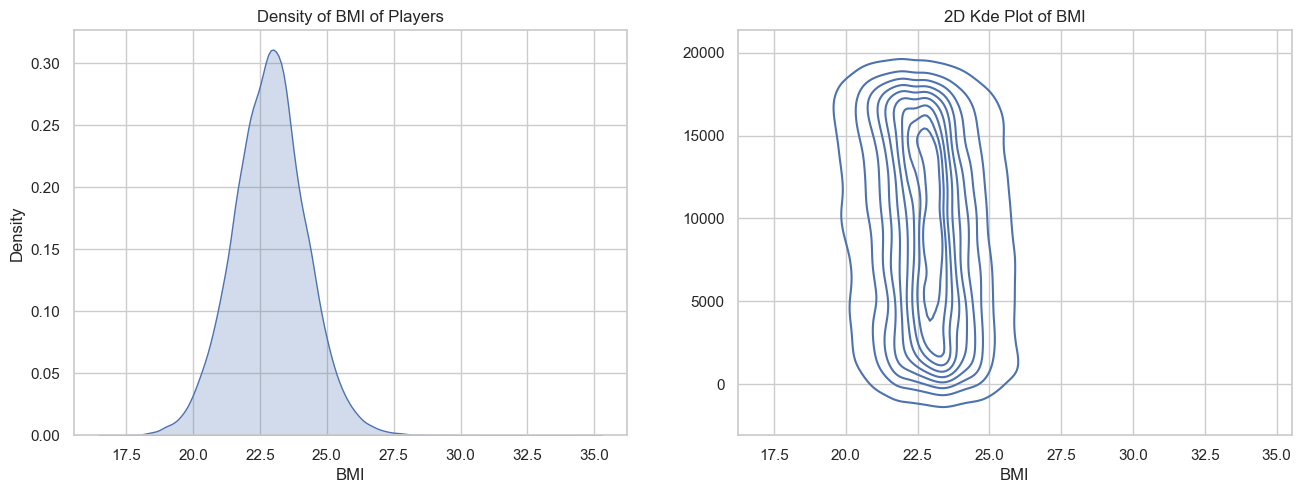

In [32]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
sns.kdeplot(data=data, x="BMI", shade=True, ax=ax[0]).set(title='Density of BMI of Players')
sns.kdeplot(data=data, x="BMI", y=data.index, ax=ax[1]).set(title='2D Kde Plot of BMI')

**Insights:**   
>Most of the players fall 22.5 to 23.5 Body Mass Index which is Ideal for Male Body

>Mean of The BMI is 22.85

###  Bivariate Analysis

#### 1) Effect of Age on Player's Overall Rating and Potential

[Text(0.5, 1.0, 'Age vs Potential')]

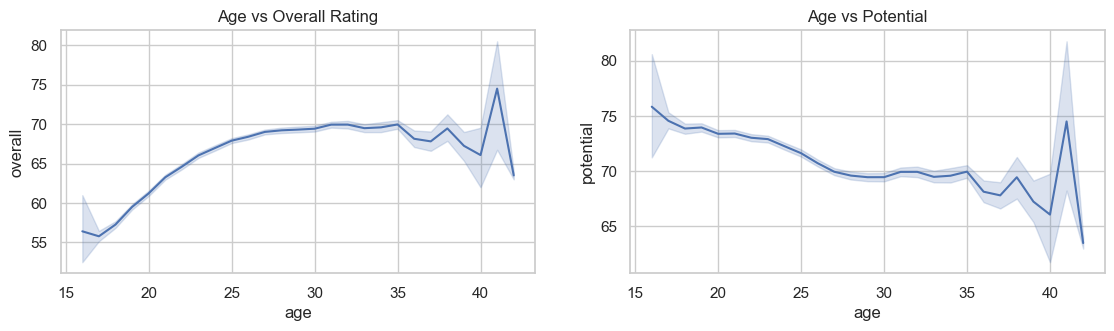

In [33]:
fig, ax = plt.subplots(1,2, figsize=(12, 3))
sns.lineplot('age','overall',data=data,  ax=ax[0]).set(title='Age vs Overall Rating')
sns.lineplot('age', 'potential', data=data, ax=ax[1]).set(title='Age vs Potential')


In [34]:
Players_Above_40=data[data["age"] > 40].reset_index(drop=True)
Players_Above_40

short_name  age  height_cm  weight_kg   nationality  \
0     G. Buffon   41        192         92         Italy   
1        Hilton   41        180         78        Brazil   
2  C. Lucchetti   41        182         69     Argentina   
3      F. Kippe   41        194         97        Norway   
4      C. Muñoz   42        177         73     Argentina   
5  H. Sulaimani   42        173         70  Saudi Arabia   

                           club  overall  potential  value_eur  wage_eur  \
0                      Juventus       83         83    2600000     58000   
1               Montpellier HSC       78         78          0     21000   
2              Atlético Tucumán       72         72     325000      5000   
3                 Lillestrøm SK       65         65          0      1000   
4  CD Universidad de Concepción       64         64      50000      1000   
5                       Al Ahli       63         63          0      5000   

  preferred_foot  international_reputation  weak_foot  skill_moves  \
0          Right                         4          2            1   
1          Right                         2          4            3   
2          Right                         1          3            1   
3           Left                         1          3            2   
4          Right                         1          3            1   
5           Left                         1          3            3   

   release_clause_eur  pace  shooting  passing  dribbling  defending  physic  \
0           4300000.0   NaN       NaN      NaN        NaN        NaN     NaN   
1                 NaN  36.0      51.0     67.0       66.0       80.0    71.0   
2            488000.0   NaN       NaN      NaN        NaN        NaN     NaN   
3                 NaN  25.0      52.0     49.0       34.0       61.0    73.0   
4             68000.0   NaN       NaN      NaN        NaN        NaN     NaN   
5                 NaN  47.0      53.0     68.0       64.0       64.0    72.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  13                   15                          13   
1                  60                   45                          79   
2                  23                   13                          23   
3                  33                   46                          70   
4                  25                   15                          13   
5                  70                   43                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       37                 17               26           20   
1                       74                 51               64           54   
2                       34                 18               24           27   
3                       56                 43               24           51   
4                       36                 12               22           19   
5                       67                 43               63           69   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 13                  35                  28   
1                 48                  73                  73   
2                 30                  32                  35   
3                 53                  55                  49   
4                 20                  34                  31   
5                 69                  68                  64   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     37                     30                55   
1                     35                     36                54   
2                     40                     45                44   
3                     24                     25                27   
4                     53                     56                33   
5                     46                     47                

**Insights:**    
> With increase in Age  their is steady rise in Overall Ratings till the age 30. From 30 to 35, it remains constant and thein starts to decline after 35. The Peak above that is shown in the graph is beacuse there are only 4 players aged 41 who have higher ratings.

> With increase in age, the potential seems to be decreasing mildly upto age 35. After age 35, is decreases significantlty. The exception at 41 is beacuse there are only 4 players, out of whom 2 players have above 90 Potential.

#### 2) Analysing Potential Ratings according to Skill Moves Ability & Weak Foot and Impact of Potential on International Reputation


[Text(0.5, 1.0, 'International Reputation Vs Potential')]

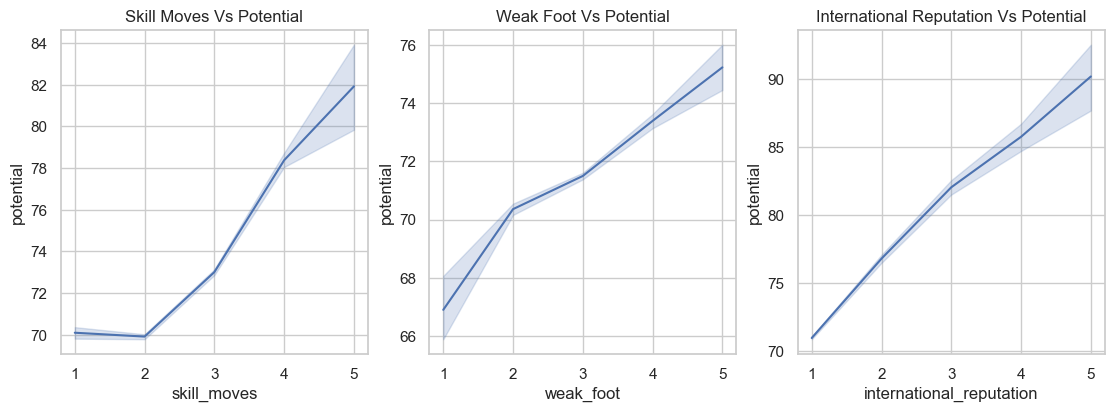

In [35]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))
sns.lineplot(x="skill_moves", y='potential', data=data, ax=ax[0]).set(title='Skill Moves Vs Potential')
sns.lineplot(x="weak_foot", y='potential', data=data, ax=ax[1]).set(title='Weak Foot Vs Potential')
sns.lineplot(x="international_reputation", y='potential',data=data, ax=ax[2]).set(title='International Reputation Vs Potential')

**Insights:**     

>Having Skill Moves ability affects Potentail Rating Postively. It Steeply rises with Skill Moves ability
Alike Skill moves, ability to play with Weak foot also affects Potential postively.

> Having heigher Potential affects International Reputation postively. Players with potential above 85 are more internationally recognised.

#### 3) Effect of Age, Height and Weight on the Pace Rating of Players

[Text(0.5, 1.0, 'Weight(kg) Vs Pace')]

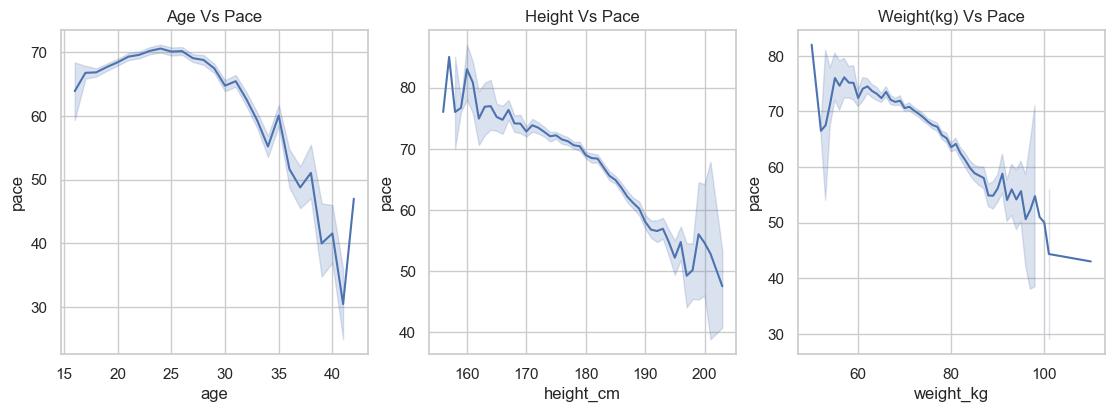

In [36]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))
sns.lineplot(x="age", y='pace', data=data, ax=ax[0]).set(title='Age Vs Pace')
sns.lineplot(x="height_cm", y='pace',data=data, ax=ax[1]).set(title='Height Vs Pace')
sns.lineplot(x="weight_kg", y='pace', data=data, ax=ax[2]).set(title='Weight(kg) Vs Pace')

**Insights:**    
> With increasing Age, Pace shows steep decline in Pace of player 

> Tall players seems to have low pace ratings as compared to short players. With increase in height, pace rating is decreasing.

> Like height, heigher Weight is also affecting pace negatively 

#### 4) Effect of Age on Acceleration, Agility and Sprint Speed of the Player.

[Text(0.5, 1.0, 'Age Vs Sprint Speed')]

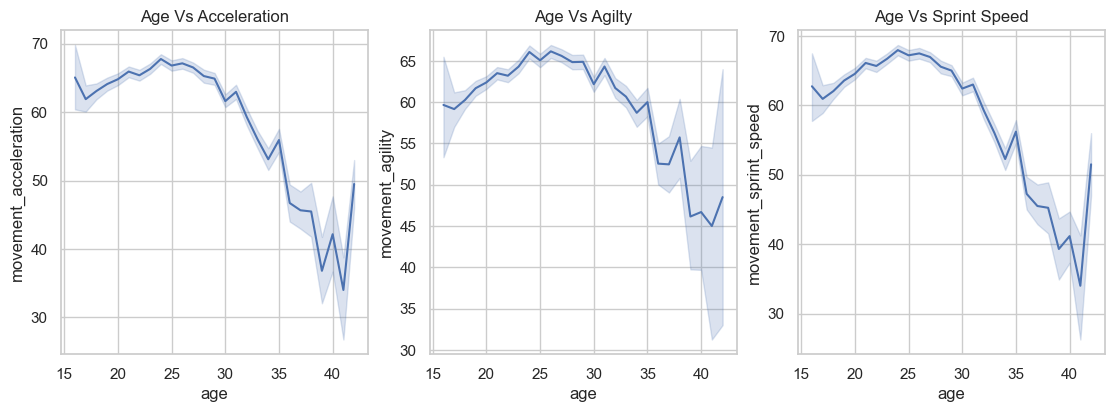

In [37]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))
sns.lineplot(x="age", y='movement_acceleration', data=data, ax=ax[0]).set(title='Age Vs Acceleration')
sns.lineplot(x="age", y='movement_agility', data=data, ax=ax[1]).set(title='Age Vs Agilty')
sns.lineplot(x="age", y='movement_sprint_speed', data=data, ax=ax[2]).set(title='Age Vs Sprint Speed')

**Insights:**  

> Age affects Acceleration, Agility and Sprint speed alike in a Negative direction. All three graphs show steep decline with increasing age. There is exception at 41 years of age because of the data of only 4 players, which can be neglected.

#### 5) Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 

In [38]:
# Seperating the Data of Strikers (ST), the Right Wingers(RW) and Left Wingers (LW)
RW=data[data["team_position"] == 'RW']
LW=data[data["team_position"] == 'LW']
ST=data[data["team_position"] == 'ST']
Offensive_list=[RW,ST,LW]  
OP_1=pd.concat(Offensive_list).reset_index(drop=True)  

OP_2= OP_1[['short_name','team_position', 'wage_eur']].sort_values(by='wage_eur', ascending=False).reset_index(drop=True)
OP=OP_2.groupby(by='team_position', as_index=False)
OP.count()

team_position  short_name  wage_eur
0            LW         162       162
1            RW         161       161
2            ST         458       458

In [39]:
OP.sum()

team_position  wage_eur
0            LW   3776000
1            RW   3385000
2            ST   7535000

In [40]:
#Average Wage of Offensive Players according to their Postion
Avg_Wage_OP =pd.DataFrame(OP.mean())
Avg_Wage_OP.rename(columns = {"wage_eur":"Average Wage"},  inplace=True)
Avg_Wage_OP.index+=1
Avg_Wage_OP

team_position  Average Wage
1            LW  23308.641975
2            RW  21024.844720
3            ST  16451.965066

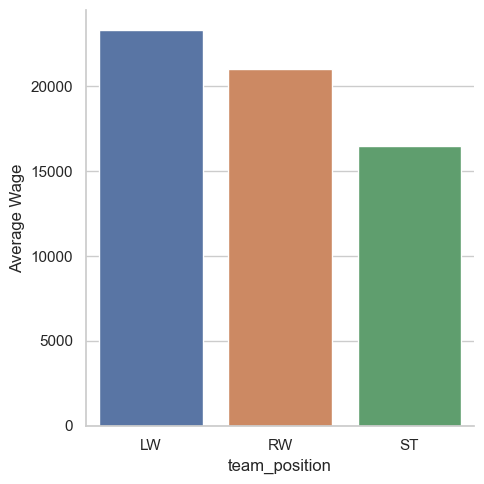

In [41]:
sns.catplot(data=Avg_Wage_OP, x="team_position", y="Average Wage", kind="bar")

**Conclusion:**

> Out of Three types of Offensive Players, Left Wingers are paid the Most with average earning of 23,309 Euros. 

> Right Wingers are at the 2nd place with average earning of 21,025 Euros and Strikers come at 3rd place with average earning of 16,452 Euros

**6) Potential Vs Wages Earned in Euros**

Text(0, 0.5, 'Wages')

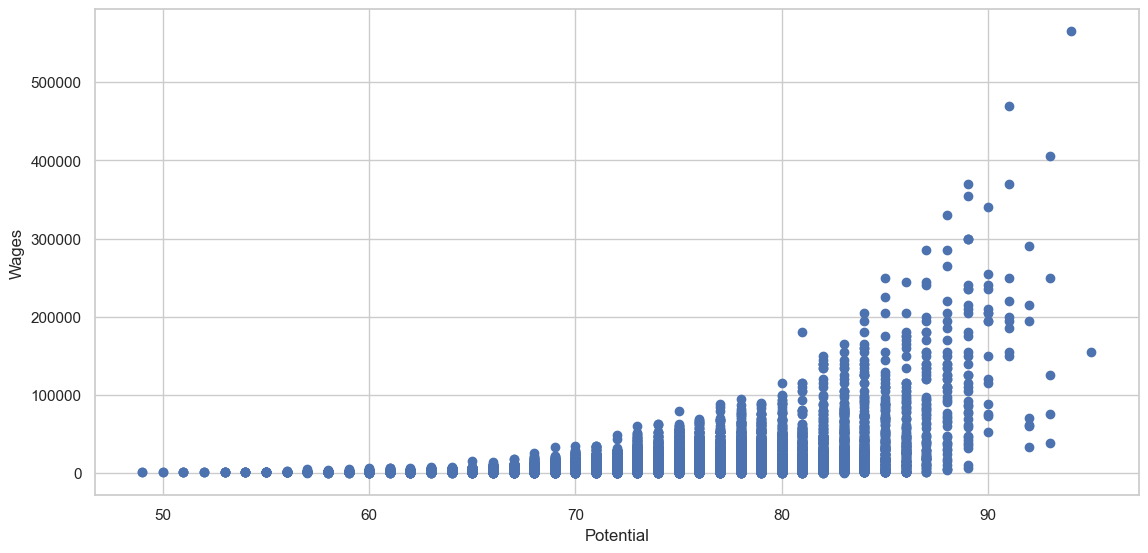

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(data.potential, data.wage_eur)
plt.xlabel('Potential')
plt.ylabel('Wages')